In [1]:
#initialise general libraries
import os
import numpy as np
import pandas as pd
from pandas import DataFrame
import pickle
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from matplotlib import pyplot as plt
%matplotlib inline

# Allows more columns to be shown for outputs
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5200)

In [2]:
#set directories
dirPData = "C:/Users/kevin/Google Drive/AML/Projects/Coursework/PData/"
dirPOutput = "C:/Users/kevin/Google Drive/AML/Projects/Coursework/POutput/"

In [3]:
#import variables
f_name = dirPData + 'ohprepVars.pickle'

with open(f_name, "rb") as f:
    dict_ = pickle.load(f)
    
df_test = dict_['df_test']
df_train = dict_['df_train']
OH_df_test = dict_['OH_df_test']
OH_df_train = dict_['OH_df_train']
del f_name, dict_

#prepare X and y
train_y = df_train['target'].values

var_notToUse = ['id']

allFeatures = [var for var in OH_df_train]

train_X = OH_df_train[allFeatures]
test_X = OH_df_test[allFeatures]

#prepare validation data
train_Xv, test_Xv, train_yv, test_yv = train_test_split(train_X, train_y, test_size=0.25, random_state=1)

# Gradient Boosting Model
## Gradient Boosting Classifier 
### Kaggle Score: 0.88140, Validation Score: 0.8799517213310317
<img src="gradboo2.png">
Technique which creates a prediction model entailing of weaker regression tree prediction models. The model uses a loss function and minimises it for supervised learning. This learning is repeated until the loss function reaches its minimum and the best 'parts' of the weaker models are identified and used

In [4]:
gb_model1v = GradientBoostingClassifier(random_state=1, learning_rate=0.111)
gb_model1v.fit(train_Xv, train_yv)
gbprediction1v = gb_model1v.predict_proba(test_Xv)
print("Validation score:",roc_auc_score(test_yv, gbprediction1v[:,1]))

Validation score: 0.8799517213310317


In [5]:
gb_model2 = GradientBoostingClassifier(random_state=1, learning_rate=0.111)
gb_model2.fit(train_X, train_y)
gbprediction2 = gb_model2.predict_proba(test_X)

In [6]:
gbpred2 = {'id': df_test['id'].values,
        'target': gbprediction2[:,1]}
df_gbpred2 = DataFrame(gbpred2)

df_gbpred2 = df_gbpred2.reset_index().set_index('id')
df_gbpred2 = df_gbpred2.drop(columns='index')
df_gbpred2.head()

,target
id,
5,0.052184
10,0.102114
11,0.034434
13,0.183621
16,0.016977


In [7]:
df_gbpred2.to_csv(r'C:/Users/kevin/Google Drive/AML/Projects/Coursework/POutput/gradboo2.csv')

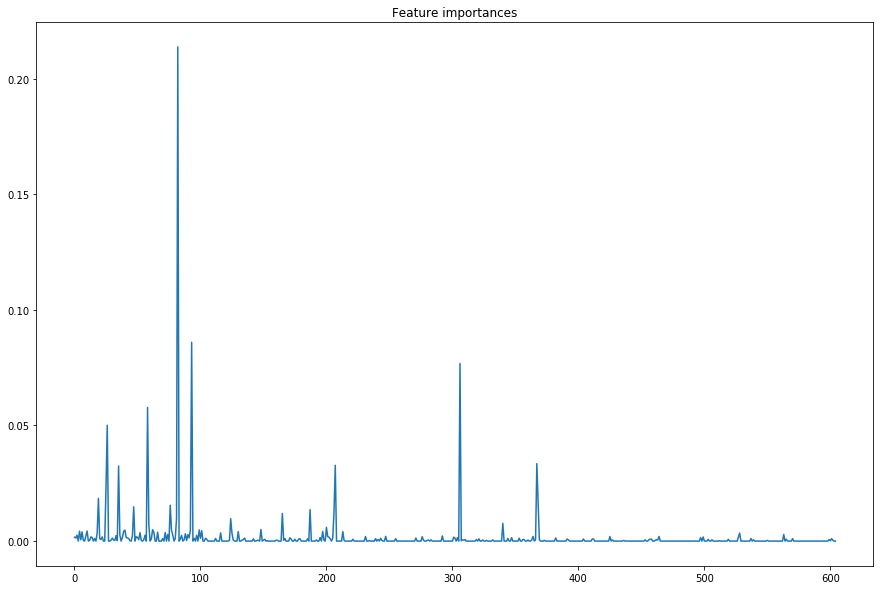

In [9]:
gbfeatsUsed2 = gb_model2.feature_importances_
plt.figure(figsize=(15,10))
plt.title("Feature importances")
plt.plot(gbfeatsUsed2)
plt.show()

* Features below 0.005 should be dropped to improve the model